In [0]:
# importing pyspark
import findspark
findspark.init()
from pyspark.sql import SparkSession
#importing wordcloud and matplotlib pyplot
from wordcloud import WordCloud
import matplotlib.pyplot as plt
from collections import Counter

In [0]:
# initialize session
spark = SparkSession.builder \
    .master("local[*]") \
    .appName('warmupproject') \
    .getOrCreate()
source = spark.sparkContext

#import text file
nytimes_data = source.textFile("/FileStore/tables/nytimes_news_articles.txt")
article_lines = nytimes_data.filter(lambda x: len(x) > 0)

# removing urls form the text data
rem_url = article_lines.filter(lambda x: not x.startswith("URL"))
total = rem_url.flatMap(lambda line: line.split(" ")) \
    .map(lambda word: (word, 1)) \
    .reduceByKey(lambda x, y: x + y).map(lambda x: (x[1], x[0])).sortByKey(False)

words = [list(i) for i in total.collect()]
for x in words:
    x[1] = x[1].replace(".", "").replace('”', "").replace(',', "").replace("“", "")

# excluding stopwords from text data
stop_words = ["A","Mr","And","Also","Make","If","His","Their","It","Two","Be","More","Was","My","Her","Said","When","Last","Including","Who","Will","Or","Present","Is","Ms","Would","Just","Can","Of","He","How","Being","Only","Our","Now","Were","Have","Had","Them","Because","She","Did","One","Did","Get","That","Some","Has","Others","Been","Are","Could","Much","No","They","Most","Not","There","We","The","What","Even","The","Its","You","New","Those","All","Made","Where","Even","Do","Aboard","About","Above","Across","After","a", "about", "above", "after", "again", "against", "ain", "all", "am", "an", "and", "any", "are","aren","aren't", "as", "at", "be", "because", "been", "before", "being", "below", "between", "both", "but","by", "can","couldn", "couldn't", "d", "did", "didn", "didn't", "do", "does", "doesn", "doesn't", "doing", "don","don't",
                "down", "during", "each", "few", "for", "from", "further", "had", "hadn", "Many","many","Mr","Mr.","time","Time","hadn't", "has", "hasn","hasn't","have", "haven", "haven't", "having", "he", "her", "here", "hers", "herself", "him", "himself", "his", "how", "i","if", "in", "into", "is", "isn", "isn't", "it", "it's", "its", "itself", "just", "ll", "m", "ma", "me","mightn","mightn't", "more", "most", "mustn", "mustn't", "my", "myself", "needn", "needn't", "no", "nor", "not","now","o", "of", "off", "on", "once", "only", "or", "other", "our", "ours", "ourselves", "out", "over", "own","re","s", "same", "shan", "shan't", "she", "she's", "should", "should've", "shouldn", "shouldn't", "so","some",
                "such", "t", "than", "that", "that'll", "the", "their", "theirs", "them", "themselves", "then", "there","these","they", "this", "those", "through", "to", "too", "under", "until", "up", "ve", "very", "was", "wasn","wasn't","we", "were", "weren", "weren't", "what", "when", "where", "which", "while", "who", "whom", "why","will", "with","won", "won't", "wouldn", "wouldn't", "y", "you", "you'd", "you'll", "you're", "you've", "your","yours","yourself", "yourselves", "could", "he'd", "he'll", "he's", "here's", "how's", "i'd", "i'll", "i'm","i've","let's", "ought", "she'd", "she'll", "that's", "there's", "they'd", "they'll", "they're", "they've","we'd","we'll", "we're", "we've", "what's", "when's", "where's", "who's", "why's", "would", "able", "abst","accordance","Against","Along","Amid","Among","Anti","Around","As","At","Before","Behind","Below","Beneath","Beside","Besides","Between","Beyond","But","By","Concerning","Considering","Despite","Down","During","Except","Excepting","Excluding","Following","For","From","In","Inside","Into","Like","Minus","Near""Of","Off","On","Onto","Opposite","Outside","Over","Past","Per","Plus","Regarding","Round","Save","Since","Than","Through","To","Toward","Towards","Under","Underneath","Unlike","Until","Up","Upon","Versus","Via","With","Within","Without","mr","Mr.","a","Mr","and","also","make","if","his","their","it","two","be","more","was","my","her","said","when","last","including","who","will","or","present","is","ms","would","just","can","of","he","how","being","only","our","now","were","have","had","them","because","she","did","one","did","get","that","some","has","others","been","are","could","much","no","they","most","not","there","we","the","what","even","The","its","you","new","those","all","made","where","even","do","aboard","about","above","across","after","against","along","amid","among","anti","around","as","at","before","behind","below","beneath","beside","besides","between","beyond","but","by","concerning","considering","despite","down","during","except","excepting","excluding","following","for","from","in","inside","into","like","minus","near""of","off","on","onto","opposite","outside","over","past","per","plus","regarding","round","save","since","than","through","to","toward","towards","under","underneath","unlike","until","up","upon","versus","via","with","within","without"]
stop_words.extend(["—", "it’s", "don’t", "i’m"])
additional = [y for y in words if y[1].lower() not in stop_words]

Top 100 words from the text file are: 
people: 9752
first: 9530
United: 6160
years: 6075
Trump: 5168
percent: 5080
three: 5005
American: 4744
going: 4732
back: 4697
still: 4653
York: 4529
million: 4522
think: 4385
may: 4343
way: 4256
year: 2898
company: 4045
work: 3995
part: 3948
take: 3914
called: 3884
former: 3822
want: 3800
government: 3692
another: 3644
States: 3641
see: 3622
might: 3507
told: 3480
go: 3388
public: 3383
next: 3364
long: 3360
know: 3338
never: 3296
say: 3291
home: 3262
good: 3244
according: 3243
recent: 3208
took: 3165
found: 3150
police: 3147
used: 3132
officials: 3106
little: 3086
well: 3022
really: 3015
state: 3007
Dr: 3002
four: 2998
come: 2946
came: 2930
use: 2919
team: 2913
second: 2882
left: 2828
whether: 2804
something: 2796
news: 2796
political: 2775
show: 2767
Mrs: 2763
right: 2756
group: 2721
got: 2707
every: 2701
put: 2698
become: 2683
European: 2680
lot: 2677
often: 2661
five: 2636
several: 2615
set: 2609
help: 2586
Clinton: 2586
need: 2545
campaign: 2533
Republican: 2529
less: 2522
best: 2473
big: 2466
city: 2460
chief: 2439
law: 2413
president: 2377
State: 2359
least: 2340
known: 2333
director: 2331
early: 2322
end: 2315
day: 2312
whose: 2308
went: 2308
play: 2302
money: 2298
--------------------------------------------------
Word cloud of Top 100 Most Used Words in all Articles is:

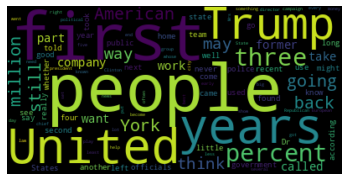

In [0]:
# Task 1
# Find Top 100 words in the text file
wordcloud_dict = {additional[z][1]: additional[z][0] for z in range(len(additional)) if z < 100}
print("Top 100 words from the text file are: ")
for key, value in wordcloud_dict.items():
  print(str(key) + ": " + str(value))

print("-"*50)
# plotting the wordcloud
print("Word cloud of Top 100 Most Used Words in all Articles is: ")
wordcloud = WordCloud()
wordcloud.generate_from_frequencies(frequencies=wordcloud_dict)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

Top five Categories are: 
sports: 1268
world: 1211
us: 1199
business: 1041
nyregion: 663
--------------------------------------------------
Word cloud of Top Five Categories is:

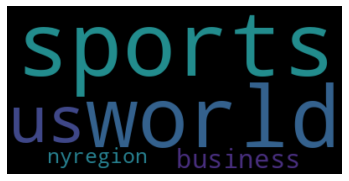

In [0]:
# Task 2
five_viewed = {}
for p in article_lines.collect():
      if p.startswith("URL"):
            classify = p.split('/')[6]
            if classify in five_viewed:
                  five_viewed[classify] += 1
            else:
                  five_viewed[classify] = 1

cat_top5 = dict(Counter(five_viewed).most_common(5))
print("Top five Categories are: ")
for k, v in cat_top5.items():
  print(str(k) + ": " + str(v))
print("-"*50)
#plotting in wordcloud for top5 category words
print("Word cloud of Top Five Categories is: ")
wordcloud.generate_from_frequencies(frequencies=cat)
plt.figure()
plt.imshow(wordcloud, interpolation="bilinear")
plt.axis("off")
plt.show()

In [0]:
# task 3
#these categories has most number of articles
category_each = {}
for parts in cat:
    for r in address:
        if parts in r:
            if parts in category_each:
                category_each[parts] += address[r]
            else:
                category_each[parts] = address[r]
category_each

#top 10 words in sports category
tenTop_sports = category_each['sports']
sport_words = tenTop_sports.split(" ")
sports_section_replace = [(s.lower()).replace(".", "").replace('”', "").replace(',', "").replace("“", "") for s in sport_words]
sport_extrawords = [q for q in sports_section_replace if q not in stop_words]
print("Top 10 words in Sports Category are: \n")
top10sports_dict = dict(Counter(sport_extrawords).most_common(10))
for k, v in top10sports_dict.items():
  print(str(k) + ": " + str(v))
print("-"*50)

#top 10 words in world category
top5_world = category_each['world']
world_words = top5_world.split(" ")
world_replace = [(v.lower()).replace(".", "").replace('”', "").replace(',', "").replace("“", "") for v in world_words]
world_extrawords = [w for w in world_replace if w not in stop_words]
print("Top 10 words in World Category are: \n")
top10world_dict = dict(Counter(world_extrawords).most_common(10))
for k, v in top10world_dict.items():
  print(str(k) + ": " + str(v))
print("-"*50)

#top 10 words in us category
top10_in_US = category_each['us']
us_area = top10_in_US.split(" ")
us_area_replace = [(u.lower()).replace(".", "").replace('”', "").replace(',', "").replace("“", "") for u in us_area]
us_extrawords = [u for u in us_area_replace if u not in stop_words]
print("Top 10 words in the US Category are: \n")
top10US_dict = dict(Counter(us_extrawords).most_common(10))
for k, v in top10US_dict.items():
  print(str(k) + ": " + str(v))
print("-"*50)

#top 10 words in business category
top10_buss = category_each['business']
buss_related = top10_buss.split(" ")
buss_related_replace = [(b.lower()).replace(".", "").replace('”', "").replace(',', "").replace("“", "") for b in buss_related]
buss_extrawords = [b for b in buss_related_replace if b not in stop_words]
print("Top 10 words in Business Category are: \n")
top10Buss_dict = dict(Counter(buss_extrawords).most_common(10))
for k, v in top10Buss_dict.items():
  print(str(k) + ": " + str(v))
print("-"*50)

#top 10 words in new york region category
top10_NY = category_each['nyregion']
NY_region = top10_NY.split(" ")
NY_region_replace = [(n.lower()).replace(".", "").replace('”', "").replace(',', "").replace("“", "") for n in NY_region]
NY_extrawords = [n for n in NY_region_replace if n not in stop_words]
print("Top 10 words in New York Category are: \n")
top10NY_dict = dict(Counter(NY_extrawords).most_common(10))
for k, v in top10NY_dict.items():
  print(str(k) + ": " + str(v))


Top 10 words in Sports Category are: 

game: 3589
first: 3373
team: 2426
season: 2002
players: 1869
games: 1864
three: 1608
second: 1599
play: 1473
league: 1397
--------------------------------------------------

Top 10 words in World Category are: 

government: 2279
people: 2246
united: 2012
states: 1414
european: 1404
years: 1352
state: 1338
party: 1298
officials: 1287
president: 1280
--------------------------------------------------

Top 10 words in the US Category are: 

trump: 4933
people: 4759
percent: 3901
year: 3494
years: 3418
states: 3278
first: 3262
company: 3191
united: 3048
state: 3044
--------------------------------------------------

Top 10 words in Business Category are: 

percent: 2670
company: 2460
million: 1730
year: 1548
companies: 1355
billion: 1326
years: 1147
people: 1114
business: 1111
chief: 1031
--------------------------------------------------

Top 10 words in New York Category are: 

york: 1326
city: 1308
police: 954
years: 951
people: 930
state: 922
year: 724
school: 605
de: 577
first: 555